<a href="https://colab.research.google.com/github/virf96/Analisis_Texto/blob/master/Techniques_text_analysis_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procesamiento de Lenguaje Natural


**Pablo Martínez Olmos, Vanessa Gómez Verdejo, Emilio Parrado Hernández**

Departamento de Teoría de la Señal y Comunicaciones

**Universidad Carlos III de Madrid**

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

# Técnicas de análisis de texto

En la sesión de hoy aprenderemos distintas técnicas para analizar la estructura de un texto y la extracción de características en base a dicha estructura. Recordemos que hasta ahora hemos aprendido las siguientes técnicas de extracción de características:

- Representación vectorial de un documento con un BoW/Bag of N-grams.
- Representación vectorial de un documento con TF-IDF.


Por una parte, en la sesión de hoy estudiaremos técnicas de extracción de características que **tienen en cuenta la estructura gramatical y sintáctica del texto**:

- Part of Speech Tagging (POS tagging)
- Análisis superficial (Shallow parsing)
- Análisis estructural (Constituency parsing)
- Detección de entidades (Name entity recognition)
- Análisis de dependencias (Dependency parsing)

Por otra parte, presentaremos técnicas sencillas para la **extracción de frases y palabras clave de un documento**:

- Extracción de frases clave de un documento con LSA y TextRank.
- Extracción de palabras clave con N-grams (collocations) y TextRank.

Para implementar algunas de las técnicas anteriores utilizaremos la librería [Spacy](https://spacy.io/). Spacy  es una librería de NLP que incorpora extensiones para trabajar con texto en distintos idiomas, incluído **el castellano**. Además, spaCy incorpora pipelines pre-entrenados con técnicas que dominan del estado del arte basadas en redes neuronales y, en particular, en redes de tipo [transformer](https://spacy.io/universe/project/spacy-transformers). 

In [ ]:
%matplotlib inline  
# Figures plotted inside the notebook
%config InlineBackend.figure_format = 'svg'  
# High quality figures
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import nltk


# download all dependencies and corpora 
nltk.download('brown')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package brown to /Users/olmos/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /Users/olmos/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /Users/olmos/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /Users/olmos/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/olmos/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/olmos/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

# 1. Características basadas en gramática

# 1.1 Parts of Speech (POS) tagging

En *POS tagging* el objetivo es asignar a cada palabra de un determinado texto una etiqueta correspondiente a su categoría gramatical (verbo, sustantivo, determinante ...) en función de su contexto, lo que puede ser muy útil para la extracción de características de un texto. Por ejemplo, podemos filtrar los sustantivos y determinar los más destacados o aquellos que pertenecen a nombres propios o **entidades**. 

Para especificar las distintas etiquetas (tags) en idioma inglés, es habitual utilizar la notación [Penn Treebank](https://repository.upenn.edu/cgi/viewcontent.cgi?article=1603&context=cis_reports). En este [enlace](https://repository.upenn.edu/cgi/viewcontent.cgi?article=1603&context=cis_reports) puede encontrarse una descripción detallada de cada categoría, con ejemplos.

<img src="http://www.tsc.uc3m.es/~olmos/BBVA/tags.png" width="40%"> 



### Aprendizaje máquina para POS tagging

En cualquier algoritmo para *POS tagging* el objetivo es estimar la etiqueta $y_i$ asociada a la palabra i-ésima $x_i$ dadas las palabras anteriores $x_{i-1},x_{i-2},\ldots,x_{i-W}$ o incluso posteriores $x_{i+1},x_{i+2},\ldots,x_{i+W}$. [Ejemplos clásicos](https://web.stanford.edu/~jurafsky/slp3/8.pdf) de métodos para POS tagging son los modelos ocultos de Markov y Conditional Random Fields (CRF).

<img src="http://www.tsc.uc3m.es/~olmos/BBVA/HMM_slide.001.jpeg" width="90%"> 

En la actualidad, los métodos con mayor precisión se basan en [redes neuronales recurrentes (RNNs)](https://arxiv.org/abs/1510.06168) o de tipo [transformer](https://github.com/soutsios/pos-tagger-bert).

<img src="http://www.tsc.uc3m.es/~olmos/BBVA/rnnPOS.png" width="70%">

## POS tagging con NLTK

En NLTK, la función `pos_tag` implementa desde 2018 el algoritmo [PerceptronTagger](https://explosion.ai/blog/part-of-speech-pos-tagger-in-python). Usando un modelo de tipo de CRF,  se entrena un clasificador que determina la probabilidad de la etiqueta $y_i$ en base al siguiente conjunto de características:

- Palabras $x_i$, $x_{i-1}$, $x_{i+1}$, $x_{i+2}$ (típicamente codificadas con *word embeddings*, que veremos la semana que viene)
- Sufijos (últimas 3 letras), prefijo (primera letra) de las palabras anteriores
- Tags de las dos palabras anteriores $y_{i-1}$, $y_{i-2}$

Las predicciones $P(y_i|x_i,x_{i-1},x_{i+1},x_{i+2},y_{i-1},y_{i-2})$ se propagan a lo largo del texto.

La utilización de dicha función en NLTK es muy sencilla:





In [ ]:
nltk.download('averaged_perceptron_tagger')

sentence = "Apple is looking at buying U.K. startup for $1 billion"

nltk_pos_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))

pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag']).T

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/olmos/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,0,1,2,3,4,5,6,7,8,9,10
Word,Apple,is,looking,at,buying,U.K.,startup,for,$,1,billion
POS tag,NNP,VBZ,VBG,IN,VBG,NNP,NN,IN,$,CD,CD


`nltk_pos_tagged` es una lista de tuplas, cada una con la palabra y su correspondiente etiqueta:

In [ ]:
nltk_pos_tagged

[('Apple', 'NNP'),
 ('is', 'VBZ'),
 ('looking', 'VBG'),
 ('at', 'IN'),
 ('buying', 'VBG'),
 ('U.K.', 'NNP'),
 ('startup', 'NN'),
 ('for', 'IN'),
 ('$', '$'),
 ('1', 'CD'),
 ('billion', 'CD')]

> **Ejercicio**: dado el siguiente texto, extraer en una lista todos los verbos:

In [ ]:
text = """
 Stanford snapped a 29-year title drought to end a season that at points seemed uncertain to be completed during the coronavirus pandemic, claiming the N.C.A.A. women’s basketball championship with a tight win Sunday over Arizona, 54-53.

Stanford led for much of the game and started the fourth quarter up 3 points. But Arizona guard Aari McDonald, who had scored the most points by any player in the tournament before Sunday’s game, started beating Stanford’s defenses and closed Arizona’s deficit to 1 on a step-back jumper with 3 minutes, 35 seconds left.

Stanford’s Haley Jones, whose game-winning shot helped the Cardinal defeat top-seeded South Carolina in the Final Four and who led them with 17 points Sunday, added a free throw to offer the Cardinal a cushion, but McDonald was hot. She got closer with a free throw, then had a final opportunity after Stanford turned it over on a shot clock violation with less than 6 seconds left.
"""

In [ ]:
print(text)


 Stanford snapped a 29-year title drought to end a season that at points seemed uncertain to be completed during the coronavirus pandemic, claiming the N.C.A.A. women’s basketball championship with a tight win Sunday over Arizona, 54-53.

Stanford led for much of the game and started the fourth quarter up 3 points. But Arizona guard Aari McDonald, who had scored the most points by any player in the tournament before Sunday’s game, started beating Stanford’s defenses and closed Arizona’s deficit to 1 on a step-back jumper with 3 minutes, 35 seconds left.

Stanford’s Haley Jones, whose game-winning shot helped the Cardinal defeat top-seeded South Carolina in the Final Four and who led them with 17 points Sunday, added a free throw to offer the Cardinal a cushion, but McDonald was hot. She got closer with a free throw, then had a final opportunity after Stanford turned it over on a shot clock violation with less than 6 seconds left.



In [ ]:
nltk_pos_tagged = nltk.pos_tag(nltk.word_tokenize(text))

In [ ]:
verbs = [w for (w,t) in nltk_pos_tagged if (t[:2]=='VB' or t =='MD')]  ## MD for modal verbs

print(verbs)

['snapped', 'end', 'seemed', 'be', 'completed', 'claiming', '’', 'led', 'started', 'guard', 'had', 'scored', 'started', 'beating', 'closed', 's', 'left', 's', 'helped', 'led', 'added', 'offer', 'was', 'got', 'had', 'turned', 'left']


Podemos ver cómo hay cierto problema en los posesivos tipo `women’s basketball`. Esto es debido símplemente a la codificación del apostrofe al copiar y pegar directamente del [enlace](https://www.nytimes.com/2021/04/04/sports/ncaabasketball/stanford-arizona-ncaa-womens-basketball-championship.html):

In [ ]:
text_new = text.replace("’","'")

# Alternativamente

#text_new = text.replace(u"\u2019",u"\u0027")

nltk_pos_tagged = nltk.pos_tag(nltk.word_tokenize(text_new))

verbs = [w for (w,t) in nltk_pos_tagged if (t[:2]=='VB' or t =='MD')]  ## MD for modal verbs

print(verbs)


['snapped', 'end', 'seemed', 'be', 'completed', 'claiming', 'led', 'started', 'guard', 'had', 'scored', 'started', 'beating', 'closed', 'left', 'helped', 'led', 'added', 'offer', 'was', 'got', 'had', 'turned', 'left']


### Desambiguación de palabras y lematización

Al tratarse de un modelo secuencial, un POS tagger permite separar cuándo determinadas palabras actúan como verbo o como sustantivo ... 

In [ ]:
sentence = "The boy John fell in a well but soon after he was feeling well"

nltk_pos_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))

pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag'])


,Word,POS tag
0,The,DT
1,boy,NN
2,John,NNP
3,fell,VBD
4,in,IN
5,a,DT
6,well,NN
7,but,CC
8,soon,RB
9,after,IN


In [ ]:
sentence2 = "I am an engineer. Some day I hope to engineer an electric engine"

nltk_pos_tagged = nltk.pos_tag(nltk.word_tokenize(sentence2))

pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag'])

,Word,POS tag
0,I,PRP
1,am,VBP
2,an,DT
3,engineer,NN
4,.,.
5,Some,DT
6,day,NN
7,I,PRP
8,hope,VBP
9,to,TO


El hecho de que un POS tagger nos permita desambiguar palabras es también útil para mejorar las prestaciones del **lematizador**. En NLTK, el lematizador de no tiene en cuenta el POS tag de cada palabra (y por tanto su contexto):

In [ ]:
nltk.stem.WordNetLemmatizer().lemmatize('loving') ## loving puede ser adjetivo o gerundio del verbo love

'loving'

In [ ]:
# Si indicamos explicitamente la categoría gramatical de la palabra

nltk.stem.WordNetLemmatizer().lemmatize('loving','v') ## Forzamos verbo ...

'love'

Para hacer la lematización mejor y dependiente del contexto, utilizaremos la etiqueta POS y la pasaremos al lematizador. 

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


text = list(nltk.word_tokenize("He seems like a loving husband and she is loving her new car."))

lemmas = [lemmatizer.lemmatize(t) for t in text]
lematizado1 = " ".join(lemmas)

print(lematizado1)

He seems like a loving husband and she is loving her new car .


Extraigamos el POS tag del texto anterior ...

In [ ]:
text_tagged = nltk.pos_tag(text)
text_tagged

[('He', 'PRP'),
 ('seems', 'VBZ'),
 ('like', 'IN'),
 ('a', 'DT'),
 ('loving', 'JJ'),
 ('husband', 'NN'),
 ('and', 'CC'),
 ('she', 'PRP'),
 ('is', 'VBZ'),
 ('loving', 'VBG'),
 ('her', 'PRP$'),
 ('new', 'JJ'),
 ('car', 'NN'),
 ('.', '.')]

Si ahora queremos utilizar este etiquetado para nuestro lematizador, tenemos que adaptarlo, ya que las entradas de pos en el lematizador no son directamente las etiquetas que nos da el etiquetador. Pero podemos hacer la conversión con esta función:

In [ ]:
from nltk.corpus import wordnet

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None


lemmas = [lemmatizer.lemmatize(t, nltk_tag_to_wordnet_tag(tag)) if (nltk_tag_to_wordnet_tag(tag) is not None) else  lemmatizer.lemmatize(t) for (t, tag) in text_tagged]
lematizado2 = " ".join(lemmas)
print(lematizado2)

He seem like a loving husband and she be love her new car .


## POS tagging en spaCy

[spaCy](https://spacy.io/) es una biblioteca gratuita de código abierto para el procesamiento avanzado del lenguaje natural en Python. spaCy está diseñado específicamente para uso en producción. A diferencia de NLTK, spaCy sigue una orientación de objetos. Por ejemplo, cuando tokenizamos un texto, cada token es un objeto con atributos y propiedades específicas.

Spacy da soporte para más de 64 idiomas, incluyendo modelos estadísticos ya entrenados para [17 de ellos](https://spacy.io/usage/models) (incluyendo word embeddings y modelos basados en [transformers](https://spacy.io/usage/v3), la última revolución en NLP).


Puesto que en esta sesión sólo vamos a cubrir algunos aspectos básicos de spaCy, en los siguientes recursos podéis encontrar material adicional:

- [spaCy 101 course](https://spacy.io/usage/spacy-101)
- [Advanced Tutorial](https://course.spacy.io/en/)


El procesado de texto con spaCy es sencillo. Cargaremos un modelo pre-entrenado para un determinado idioma, y pasamos cualquier texto a procesar. spaCy ejecutará una serie de procesos (pipeline) sobre el mismo y  devolverá un objeto tipo `doc`.

<figure>
<center>
<img src='https://spacy.io/images/architecture.svg' width="800"></img>
<figcaption>From Spacy documentation</figcaption></center>
</figure>

La arquitectura básica en spaCy es la siguiente:

   - `Language`: se determina al cargar el modelo y el pipeline de procesos asociados. Trasforma texto en objectos spaCy.
   - `Doc`: Secuencia iterable de tokens. 
   - `Vocab`: Diccionario asociado al modelo.  



En el siguiente código, descargamos e importamos uno de los [modelos estadísticos pre-entrenados para idioma inglés](https://spacy.io/models/en)...

In [ ]:
# Para forzar spacy 3.0 (con colab se abre 2.2.X)
#!pip install --upgrade spacy

In [ ]:
# Descargamos el modelo
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.9 MB 3.1 MB/s            
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import spacy

# Cargamos el modelo
nlp = spacy.load("en_core_web_sm")

El **acceso al vocabulario** en modo se hace a través del atributo `.vocab.strings`

In [ ]:
lista_vocab = list(nlp.vocab.strings)

print("El tamaño del diccionario es de {} palabras".format(len(lista_vocab)))

#Las 200 primeras
print(lista_vocab[:200])

El tamaño del diccionario es de 83839 palabras
['\t', '\n', ' ', '  ', '!', '!!', '!!!', '!!!!', '!!!!!!!!!!!!!!!!', '!!!!.', '!!.', '!!?', '!!??', '!*', '!.', '!?', '!??', '"', '""', '#', "##'s", "##'x", "#'s", '#15', '#^%', '#dd', '$', '$19', '$Whose', '$Xxxxx', '$whose', '$xxxx', '%', '%-3', '%ach', '%ah', '%eh', '%er', '%ha', '%hm', '%huh', '%mm', '%oof', '%pw', '%uh', '%um', '%xx', '%xxx', '&', '&#', '&G.', '&L.', '&Ls', '&M.', '&P.', '&SA', '&T.', '&ex', '&in', '&ls', '&of', '&on', '&sa', '&the', '&to', '&uh', '&von', '&xx', '&xxx', "'", "''", "''It", "''Xx", "''it", "''xx", "'-(", "'-)", "'03", "'07", "'20s", "'30s", "'40s", "'45", "'46", "'50s", "'60s", "'67", "'68", "'69", "'70's", "'70s", "'71", "'73", "'74", "'76", "'78", "'80", "'80's", "'80s", "'82", "'86", "'89", "'90's", "'90s", "'91", "'94", "'96", "'97", "'98", "'99", "'Arabi", "'Cause", "'Connery", "'Cos", "'Coz", "'Cuz", "'Id", "'Il", "'It", "'N", "'Nita", "'S", "'T", "'X", "'Xx", "'Xxx", "'Xxxx", "'Xxxxx", "'ai", "'

Podemos ver que el vocabulario incluye ya emoticonos codificados en modo texto.

> **Ejercicio**: Cree una lista con las palabras del vocabulario que únicamente contienen caracteres alfabéticos ([a-zA-Z]). ¿Cuántas palabras obtiene?. Imprima las 20 primeras ...

In [ ]:
no_alpha_words = [word for word in nlp.vocab.strings if word.isalpha() is True]

print(f'Hay un total de {len(no_alpha_words)} palabras con caracterés alfabéticos. \n Las 20 primeras son ...')

print(no_alpha_words[:20])

Hay un total de 73384 palabras con caracterés alfabéticos. 
 Las 20 primeras son ...
['A', 'AA', 'AAA', 'AAC', 'AAV', 'AB', 'ABA', 'ABB', 'ABBA', 'ABBIE', 'ABC', 'ABCs', 'ABD', 'ABM', 'ABORTION', 'ABS', 'ABUSE', 'AC', 'ACC', 'ACCEPTANCES']


A continuación, vamos a utilizar el pipeline que hemos cargado para analizar un texto ...

In [ ]:
print(sentence2)

doc = nlp(sentence2)

I am an engineer. Some day I hope to engineer an electric engine


`doc` es un objeto iterable, compuesto por objetos tipo [`token`](https://spacy.io/api/token). En el siguiente bucle imprimimos algunas de las propiedades de dichos tokens determinadas por el pipeline que hemos cargado, incluyendo el POS tag:

In [ ]:
for token in doc:
    print(token.text, token.lemma_, token.tag_, token.is_alpha, token.is_stop,token.is_punct)
    print('*****')

I I PRP True True False
*****
am be VBP True True False
*****
an an DT True True False
*****
engineer engineer NN True False False
*****
. . . False False True
*****
Some some DT True True False
*****
day day NN True False False
*****
I I PRP True True False
*****
hope hope VBP True False False
*****
to to TO True True False
*****
engineer engineer VB True False False
*****
an an DT True True False
*****
electric electric JJ True False False
*****
engine engine NN True False False
*****


En forma de tabla ...

In [ ]:
spacy_pos_tagged = [(token.text, token.lemma_, token.tag_,token.is_alpha, token.is_stop,token.is_punct) for token in doc]

pd.DataFrame(spacy_pos_tagged, columns=['Word','Word_Lemma','POS tag','Is alpha','Is stopword','Is punct'])

,Word,Word_Lemma,POS tag,Is alpha,Is stopword,Is punct
0,I,I,PRP,True,True,False
1,am,be,VBP,True,True,False
2,an,an,DT,True,True,False
3,engineer,engineer,NN,True,False,False
4,.,.,.,False,False,True
5,Some,some,DT,True,True,False
6,day,day,NN,True,False,False
7,I,I,PRP,True,True,False
8,hope,hope,VBP,True,False,False
9,to,to,TO,True,True,False


Con `spacy.explain()` podemos obtener una descripción de los distintos tags ...

In [ ]:
spacy.explain("VBP")

'verb, non-3rd person singular present'

In [ ]:
spacy.explain("JJ")

'adjective (English), other noun-modifier (Chinese)'

En lo referente a **stopping words**, spaCy incluye una amplia lista (326 elementos en idioma inglés) que podemos personalizar para nuestra propia aplicación si es necesario.


In [ ]:
spacy_stopwords = nlp.Defaults.stop_words

#Printing the total number of stop words:
print('Number of stop words: %d' % len(spacy_stopwords))

#Printing first ten stop words:
print('First ten stop words: %s' % list(spacy_stopwords)[:20])

Number of stop words: 326
First ten stop words: ['whose', 'also', 'within', 'all', 'as', 'its', 'seemed', 'thereby', 'though', 'full', 'most', 'several', 'which', 'although', 'alone', 'across', 'mostly', 'must', 'could', 'due']


In [ ]:
# Añadir una palabra al conjunto de stopping words

nlp.Defaults.stop_words.add("my_new_stopword")

print('Number of stop words: %d' % len(nlp.Defaults.stop_words))

# Quitar una palabra del conjunto de stopping words

nlp.Defaults.stop_words.remove("my_new_stopword")

print('Number of stop words: %d' % len(nlp.Defaults.stop_words))



Number of stop words: 327
Number of stop words: 326


## Usando modelos estadísticos en Spacy para idioma español

Tal y como hemos comentado, Spacy proporciona modelos pre-entrenados para trabajar con idioma español. Todos han sido entrenados en la base de datos anotada [Ancora](http://clic.ub.edu/corpus/). Este corpus contiene 500.000 textos  periodísticos publicados en medios españoles. 

Es recomendable mirar la siguiente [documentación](https://spacy.io/models/es).


In [ ]:
!python -m spacy download es_core_news_sm

     |████████████████████████████████| 14.0 MB 3.2 MB/s            
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [ ]:
nlp = spacy.load("es_core_news_sm")

lista_vocab = list(nlp.vocab.strings)

print("El tamaño del diccionario es de {} palabras. Las primeras 100 son \n".format(len(lista_vocab)))

print(lista_vocab[:100])

#Printing the total number of stop words:
print('\nHay un total de {0} stopping words en el modelo'.format(len(spacy.lang.es.stop_words.STOP_WORDS)))



El tamaño del diccionario es de 181846 palabras. Las primeras 100 son 

['\t', '\n', ' ', '  ', ' el', ' tú', ' yo', ' él', '!', '"', '"""', '"Caño"', '"El', '"Guga"', '"Steel"', '"Torito"', '"Tucho"', '"Xx', '"Xxxx"', '"Xxxxx"', '"añicos', '"caño"', '"el', '"guga"', '"steel"', '"torito"', '"tucho"', '"write', '"xx', '"xxxx', '"xxxx"', '#', '$', '%', '&', "'", "' matar tú '", "' xxxx xx '", "''", "'-(", "'-)", "'13", "'23", "'70", "'92", "'96", "'Arteaga'", "'Catanha'", "'Erika'", "'Guti'", "'Or", "'Xxxx'", "'Xxxxx'", "'an", "'arteaga'", "'catanha'", "'d", "'di", "'em", "'er", "'erika'", "'ev", "'excelencia'", "'guti'", "'hooligans'", "'il", "'in", "'ir", "'ll", "'m", "'matarte'", "'mystes'", "'or", "'re", "'s", "'savoir", "'síndrome", "'ve", "'wa", "'x", "'xx", "'xxxx", "'xxxx'", "'ya", "'нs", '(', '(((', '(*>', '(*_*)', '(-8', '(-:', '(-;', '(-_-)', '(-d', '(._.)', '(:', '(;', '(=', '(>_<)', '(^_^)']

Hay un total de 551 stopping words en el modelo


De nuevo, acceder a las POS taggs es inmediato

In [ ]:
doc = nlp("""Los bosques tropicales de América Latina que conocemos hoy en día, incluida la selva amazónica
y la mata atlántica, nacieron gracias al impacto del meteorito que extinguió a los dinosaurios, 
según revela un artículo publicado la semana pasada en la Revista Science.""")

spacy_pos_tagged = [(token.text, token.lemma_, token.tag_) for token in doc]

pd.DataFrame(spacy_pos_tagged, columns=['Word','Word_Lemma','POS tag']).T

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
Word,Los,bosques,tropicales,de,América,Latina,que,conocemos,hoy,en,...,artículo,publicado,la,semana,pasada,en,la,Revista,Science,.
Word_Lemma,el,bosque,tropical,de,América,Latina,que,conocer,hoy,en,...,artículo,publicado,el,semana,pasado,en,el,Revista,Science,.
POS tag,DET,NOUN,ADJ,ADP,PROPN,PROPN,PRON,VERB,ADV,ADP,...,NOUN,ADJ,DET,NOUN,ADJ,ADP,DET,PROPN,PROPN,PUNCT


# 1.2. Análisis  superficial o fragmentación (shallow parsing or chunking)

El análisis sintáctico superficial o fragmentación (*shallow parsing (SP) or chunking*) es una técnica para agrupar tokens adyacentes en **sintagmas** en función de sus etiquetas POS. Entendemos por  **sintagma** una palabra o grupo de palabras que constituyen una unidad sintáctica y que cumplen una función determinada con respecto a otras palabras de la oración. 

SP típicamente se centra en la identificación de **determinados tipos de sintagma**, tales como sintagmas sustantivo o verbales. **SP no realiza un análisis profundo** de dichos sintagmas para determinar la relación entre estos mediante mediante reglas sintácticas o gramáticales. En esto último se centran métodos tales como **dependency parsing (DP)**.

Se establecen cinco categorías principales de sintagmas:

- **Sintagma nominal** ([Noun Phrase](https://dictionary.cambridge.org/es/gramatica/gramatica-britanica/noun-phrases?q=Noun+phrases)  NP): Un sustantivo actúa como palabra principal. Pueden ser reemplazadas por un pronombre sin hacer que la oración o cláusula sea sintácticamente incorrecta. 

- **Sintagma verbal** ([Verb phrase](https://dictionary.cambridge.org/es/gramatica/gramatica-britanica/verb-phrases?q=Verb+phrases)  VP): Tienen un verbo que actúa como palabra principal, incluyendo el verbo principal, infinitivos y participios. 

- **Sintagma adjetival** ([Adjective phrase](https://dictionary.cambridge.org/es/gramatica/gramatica-britanica/adjective-phrases)  ADJP): Son sintagmas cuya palabra principal es un adjetivo. Su función principal es describir o calificar sustantivos y pronombres en una oración. 

- **Sintagma adverbial** ([Adverb phrase](https://dictionary.cambridge.org/es/gramatica/gramatica-britanica/adverb-phrases?q=Adverb+phrases) o ADVP): un adverbio actúa como la palabra principal del sintagma. Se utilizan como modificadores de sustantivos o verbos al proporcionar más detalles para describirlos o calificarlos.

- **Sintagma preposicional** ([Prepositional phrase](https://dictionary.cambridge.org/es/gramatica/gramatica-britanica/prepositional-phrases?q=Prepositional+phrases) PP): Estos sintagmas suelen contener una preposición como palabra principal y otros componentes léxicos como sustantivos, pronombres, etc.

La detección de sintagma nominales (**NP chunking**) es la variante más común de SP. Vamos a estudiar distintos recursos para NP chunking, usando tanto NLTK como Spacy.

## NP chuking con NLTK y expresiones regulares

Utilizamos la clase [RegexpParser](https://www.nltk.org/book_1ed/ch07.html) para detectar frases sustantivas (NP chunking) definiendo reglas gramáticas sencillas. 

In [ ]:
from IPython.display import display
from nltk.chunk import RegexpParser

sentence = "The little dog barked at the dirty gray cat, who jumped over the old brown fence"

# get POS tagged sentence
tagged_simple_sent = nltk.pos_tag(nltk.word_tokenize(sentence)) 
print('POS Tags:', tagged_simple_sent)

POS Tags: [('The', 'DT'), ('little', 'JJ'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'IN'), ('the', 'DT'), ('dirty', 'JJ'), ('gray', 'JJ'), ('cat', 'NN'), (',', ','), ('who', 'WP'), ('jumped', 'VBD'), ('over', 'IN'), ('the', 'DT'), ('old', 'JJ'), ('brown', 'JJ'), ('fence', 'NN')]


Extraigamos NPs formados por un determinante, seguido de un número cualquiera de adjetivos y por último un sustantivo. La sintáxis es parecida a la utilizada en expresiones regulares en Python.

In [ ]:
# En Google Colab hay que ejecutar la siguiente celda para la visualización 
'''
### CREATE VIRTUAL DISPLAY ###
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.

### INSTALL GHOSTSCRIPT (Required to display NLTK trees) ###
!apt install ghostscript python3-tk
'''

"\n### CREATE VIRTUAL DISPLAY ###\n!apt-get install -y xvfb # Install X Virtual Frame Buffer\nimport os\nos.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8\nos.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.\n\n### INSTALL GHOSTSCRIPT (Required to display NLTK trees) ###\n!apt install ghostscript python3-tk\n"

(S
  (NP The/DT little/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT dirty/JJ gray/JJ cat/NN)
  ,/,
  who/WP
  jumped/VBD
  over/IN
  (NP the/DT old/JJ brown/JJ fence/NN))


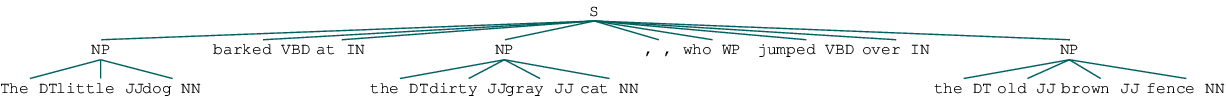

In [ ]:
# Ejemplo de NP chunking sencillo

grammar = "NP: {<DT>?<JJ>*<NN>}"

cp = nltk.RegexpParser(grammar)

result = cp.parse(tagged_simple_sent)

print(result)

# Visualization using display does not work in Google Colab
display(result)


La regla anterior es sencilla y ciertamente puede fallar:

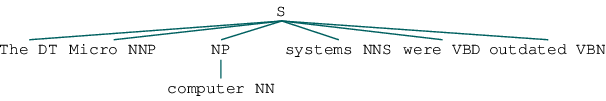

In [ ]:
sentence2 = "The Micro computer systems were outdated"

# Visualization using display does not work in Google Colab
display(cp.parse(nltk.pos_tag(nltk.word_tokenize(sentence2))))

podemos comprobar cómo "Micro computer systems" se ha dividido en tres NP. Un patrón más robusto podría ser `<DT>?<JJ.*>*<NN.*>+`, que consiste en uno o ningún determinante, un cierto número de adjetivos de cualquier tipo o ninguno, y uno o más nombres. La sintáxis es parecida a la utilizada en expresiones regulares en Python.

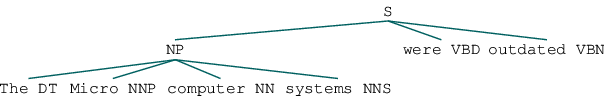

In [ ]:
# Otra regla gramatical más completa

grammar2 = "NP: {<DT>?<JJ.*>*<NN.*>+}"

cp2 = nltk.RegexpParser(grammar2)

# Visualization using display does not work in Google Colab
display(cp2.parse(nltk.pos_tag(nltk.word_tokenize(sentence2))))



A veces es más fácil definir qué queremos excluir de un fragmento. Esta técnica se conoce como *chinking*. En el siguiente ejemplo, "barked at" son las palabras que podríamos excluir para obtener dos NP:

*the little yellow dog barked at the cat*

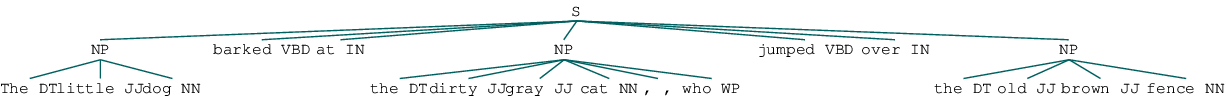

In [ ]:
# Ejemplo de chiking

grammar3 = r"""
  NP:
    {<.*>+}          # Chunk everything {}
    }<VB.*>+<IN>?{      # Excluímos verbos y una prepsoición final }{
  """

cp3 = nltk.RegexpParser(grammar3)

# Visualization using display does not work in Google Colab
display(cp3.parse(nltk.pos_tag(nltk.word_tokenize(sentence))))


Siguiendo esta misma idea, podemos definir SP genéricos para distintos tipos de frases. A continuación definitmos una regla gramatical para detectar los 5 tipos de frases (NP, ADJP,ADVP,PP,VP):

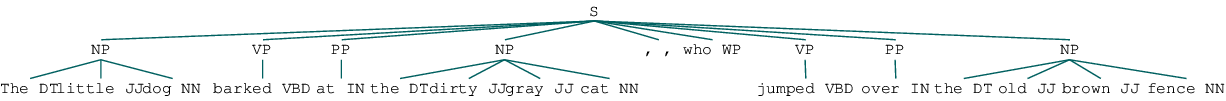

In [ ]:
# create a more generic shallow parser 
grammar = """
NP: {<DT>?<JJ.*>*<NN.*>+} 
ADJP: {<JJ>}
ADVP: {<RB.*>}
PP: {<IN>}
VP: {<MD>?<VB.*>+}
"""

cp4 = RegexpParser(grammar)

# Visualization using display does not work in Google Colab
display(cp4.parse(nltk.pos_tag(nltk.word_tokenize(sentence))))

De forma alternativa, podemos plantear una estrategia [SP basada en clasificación](https://www.nltk.org/book_1ed/ch07.html), en el que tratamos el problema de chuking como un algoritmo de clasificación de aprendizaje automático tradicional: incorporamos un conjunto de características y creamos predicciones. Claramente, nuestro conjunto de características es más grande que solo las etiquetas POS que usamos en el fragmento de expresiones regulares; podemos extraer información sobre el texto de los tokens, secuencias de tokens, frecuencias, longitudes de oraciones, ocurrencias de puntuación, etc. En el enfoque basado en clasificadores, aprovecharemos esta información para crear nuevas características para nuestro clasificador.

En este [enlace](https://www.nltk.org/book_1ed/ch07.html) tenéis ejemplos de cómo entrenar el modelo. El [Stanford parser](https://nlp.stanford.edu/software/lex-parser.shtml#Download), desarrollado por el grupo de procesado de lenguaje de la Universidad de Stanford, es probablemente el software más recomendado. Funciona en Java, pero tiene una API para python a través de NLKT. Desde 2014 este parser está entrenado con redes neuronales.

Una forma más potente para implementar SP es concretar de forma más detallada reglas gramaticales para determinar los distintos sintagmas y las relaciones entre ellos.  Esto es lo que se conoce como [constituency parsing](https://web.stanford.edu/~jurafsky/slp3/13.pdf).


<img src="http://www.tsc.uc3m.es/~olmos/BBVA/con_tree.png" width="50%"> 

En esta [web](https://demo.allennlp.org/constituency-parsing
) podemos hacer uso de un método avanzado de constituency parser con word embeddings basados en transformer networks.


## NP chuking en Spacy

A diferencia de NLTK, muchos de los distintos modelos pre-entrenados de Spacy sí incluyen NP chuking:

In [ ]:
nlp = spacy.load("en_core_web_sm")

print(sentence)
print('******')

doc = nlp(sentence)

for chunk in doc.noun_chunks:
    print(chunk.text)
    print('******')

The little dog barked at the dirty gray cat, who jumped over the old brown fence
******
The little dog
******
the dirty gray cat
******
who
******
the old brown fence
******


Y ahora en castellano ...

In [ ]:
nlp = spacy.load("es_core_news_sm")

doc = nlp("El cachorro ladró al gato sucio y gris, quien saltó por encima de la valla.")

for chunk in doc.noun_chunks:
    print(chunk.text)
    print('******')

El cachorro
******
gato sucio y gris
******
quien
******
encima de la valla
******


Al igual que en NLTK, podemos crear nuestra propia gramática para obtener los NPs de un documento usando expresiones regulares y la clase ['Matcher'](https://spacy.io/api/matcher) de Spacy.

# 1.3 Reconocimiento de entidades (Name entity recognition NER)

Si bien POS tagging nos marcará que palabras como Janet, Stanford University y Colorado son nombres propios, estos nombres propios se refieren a tipos de entidades distintas: Janet es una persona, Stanford University es una organización y Colorado es una ubicación geográfica.

La tarea de reconocimiento de entidades (NER) es encontrar tramos de texto que constituyan nombres propios y etiquetar el tipo de entidad. Este aspecto es especialmente relevante en **Information Retrieval**. Las cuatro etiquetas de entidad son las más comunes: PER (persona), LOC (ubicación), ORG (organización) o GPE (entidad geopolítica). Sin embargo, el término entidad se extiende comúnmente para incluir características que no son entidades per se, incluidas fechas, horas y otros tipos de expresiones temporales, e incluso expresiones numéricas como precios. 

Los distintos modelos NER son fundamentalmente algoritmos de aprendizaje automático entrenados sobre bases de datos etiquetadas. Por tanto, su rendimiento está ligado al tipo de texto en que fueron entrenados y esto implica que para un nuevo tipo de texto pueden no alcanzar las mismas prestaciones.  Si se considera necesario, [Spacy permite hacer un ajuste fino](https://course.spacy.io/en/chapter4) (reentrenar) cualquiera de sus modelos a un nuevo corpus de documentos. 

## NER con NLTK

NLTK proporciona un clasificador `nltk.ne_chunk` que ha sido entrenado para NER en idioma inglés.  Para utilizarlo, hay que darle como entrada una lista de tokens con su correspondiente POS tag.



In [ ]:
sentence = "The EU has not imposed new sanctions on China over human rights abuses since the 1989 Tiananmen Square crackdown"

In [ ]:
pos_tagged_sentence = nltk.pos_tag(nltk.word_tokenize(sentence))

print(nltk.ne_chunk(pos_tagged_sentence))

(S
  The/DT
  (GPE EU/NNP)
  has/VBZ
  not/RB
  imposed/VBN
  new/JJ
  sanctions/NNS
  on/IN
  (GPE China/NNP)
  over/IN
  human/JJ
  rights/NNS
  abuses/NNS
  since/IN
  the/DT
  1989/CD
  (FACILITY Tiananmen/NNP Square/NNP)
  crackdown/NN)


## NER en Spacy

Spacy implementa alguno de los algoritmos más avanzados del estado del arte para NER. 


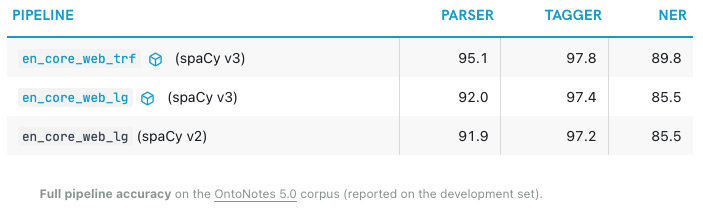

In [ ]:
text = """Three more countries have joined an "international grand committee" of parliaments, 
adding to calls for Facebook’s boss, Mark Zuckerberg, to give evidence on misinformation to the coalition. 
Brazil, Latvia and Singapore bring the total to eight different parliaments across the world, 
with plans to send representatives to London on 27 November with the intention of hearing from Zuckerberg. 
Since the Cambridge Analytica scandal broke, the Facebook chief has only appeared in front of two legislatures: 
the American Senate and House of Representatives, and the European parliament. Facebook has consistently 
rebuffed attempts from others, including the UK and Canadian parliaments, to hear from Zuckerberg. He added that 
an article in the New York Times on Thursday, in which the paper alleged a pattern of behaviour from Facebook to 
"delay, deny and deflect" negative news stories, "raises further questions about how recent data breaches were 
allegedly dealt with within Facebook."""

In [ ]:
print(text)

Three more countries have joined an "international grand committee" of parliaments, 
adding to calls for Facebook’s boss, Mark Zuckerberg, to give evidence on misinformation to the coalition. 
Brazil, Latvia and Singapore bring the total to eight different parliaments across the world, 
with plans to send representatives to London on 27 November with the intention of hearing from Zuckerberg. 
Since the Cambridge Analytica scandal broke, the Facebook chief has only appeared in front of two legislatures: 
the American Senate and House of Representatives, and the European parliament. Facebook has consistently 
rebuffed attempts from others, including the UK and Canadian parliaments, to hear from Zuckerberg. He added that 
an article in the New York Times on Thursday, in which the paper alleged a pattern of behaviour from Facebook to 
"delay, deny and deflect" negative news stories, "raises further questions about how recent data breaches were 
allegedly dealt with within Facebook.


In [ ]:
nlp = spacy.load('en_core_web_sm')

text_nlp = nlp(text)

Una vez cargado el modelo y procesado nuestro texto, cada token tiene una etiqueta asociada al tipo de entidad:

In [ ]:
ner_tagged = [(word.text, word.ent_type_) for word in text_nlp]
print(ner_tagged)

[('Three', 'CARDINAL'), ('more', ''), ('countries', ''), ('have', ''), ('joined', ''), ('an', ''), ('"', ''), ('international', ''), ('grand', ''), ('committee', ''), ('"', ''), ('of', ''), ('parliaments', ''), (',', ''), ('\n', ''), ('adding', ''), ('to', ''), ('calls', ''), ('for', ''), ('Facebook', 'ORG'), ('’s', ''), ('boss', ''), (',', ''), ('Mark', 'PERSON'), ('Zuckerberg', 'PERSON'), (',', ''), ('to', ''), ('give', ''), ('evidence', ''), ('on', ''), ('misinformation', ''), ('to', ''), ('the', ''), ('coalition', ''), ('.', ''), ('\n', ''), ('Brazil', 'GPE'), (',', ''), ('Latvia', 'GPE'), ('and', ''), ('Singapore', 'GPE'), ('bring', ''), ('the', ''), ('total', ''), ('to', ''), ('eight', 'CARDINAL'), ('different', ''), ('parliaments', ''), ('across', ''), ('the', ''), ('world', ''), (',', ''), ('\n', ''), ('with', ''), ('plans', ''), ('to', ''), ('send', ''), ('representatives', ''), ('to', ''), ('London', 'GPE'), ('on', ''), ('27', 'DATE'), ('November', 'DATE'), ('with', ''), ('th

El paquete `displacy` de spaCy proporciona una interfaz visual muy útil en este caso:

In [ ]:
from spacy import displacy

displacy.render(text_nlp, style='ent', jupyter=True)

En la representación anterior podemos ver hasta 6 categorías distintas. Podemos extraer todas las entidades de forma sencilla:

In [ ]:
ner_tagged_red = [(word,tag) for (word,tag) in ner_tagged if tag]

print(ner_tagged_red)


[('Three', 'CARDINAL'), ('Facebook', 'ORG'), ('Mark', 'PERSON'), ('Zuckerberg', 'PERSON'), ('Brazil', 'GPE'), ('Latvia', 'GPE'), ('Singapore', 'GPE'), ('eight', 'CARDINAL'), ('London', 'GPE'), ('27', 'DATE'), ('November', 'DATE'), ('Zuckerberg', 'ORG'), ('Cambridge', 'GPE'), ('Analytica', 'GPE'), ('Facebook', 'ORG'), ('two', 'CARDINAL'), ('American', 'NORP'), ('Senate', 'ORG'), ('House', 'ORG'), ('of', 'ORG'), ('Representatives', 'ORG'), ('European', 'NORP'), ('UK', 'GPE'), ('Canadian', 'NORP'), ('Zuckerberg', 'ORG'), ('the', 'ORG'), ('New', 'ORG'), ('York', 'ORG'), ('Times', 'ORG'), ('Thursday', 'DATE'), ('Facebook', 'WORK_OF_ART')]


# 1.4 Dependency parsing

*Dependency parsing* es el proceso de extraer el análisis sintáctico de dependencias de una oración para representar su estructura gramatical. Define la relación de dependencia entre las palabras clave y sus dependientes. El encabezado de una oración no tiene dependencia y se llama raíz de la oración. El verbo suele ser el encabezado de la oración. Todas las demás palabras están vinculadas al encabezado. Este análisis proporciona información sobre qué papel juega una palabra en el texto y cómo se relacionan las diferentes palabras entre sí. También se utiliza en el *shallow parsing* y en NER.

Las dependencias se codifican en una estructura de tipo árbol: las palabras son los nodos que están conectadas en función de su dependencia gramatical. 





In [ ]:
sentence = "The EU has not imposed new sanctions on China since the Tiananmen Square crackdown"
nlp = spacy.load("en_core_web_sm")

doc = nlp(sentence)


for token in doc:
    print (token.text, token.tag_, token.head.text, token.dep_) 

# The next display does not work in Google Colab
displacy.render(doc, style='dep')

The DT EU det
EU NNP imposed nsubj
has VBZ imposed aux
not RB imposed neg
imposed VBN imposed ROOT
new JJ sanctions amod
sanctions NNS imposed dobj
on IN sanctions prep
China NNP on pobj
since IN imposed prep
the DT crackdown det
Tiananmen NNP Square compound
Square NNP crackdown compound
crackdown NN since pobj


En el ejemplo anterior, podemos ver distintos tipos de relaciones entre las palabras. Una lista completa puede consultarse en este [enlace](https://nlp.stanford.edu/software/dependencies_manual.pdf).

spaCy proporciona atributos tales como `children`, `lefts`, `rights`, and `subtree` para recorrer el árbol de dependencias:

In [ ]:
print(doc[4].text) #doc[4] -> 'imposed'

imposed


In [ ]:
print(list(doc[4].children)) #doc[4] -> 'imposed'

[EU, has, not, sanctions, since]


In [ ]:
print(list(doc[4].lefts))

[EU, has, not]


In [ ]:
print(list(doc[4].rights))

[sanctions, since]


In [ ]:
print(list(doc[1].ancestors)) #doc[1] -> 'EU'

[imposed]


In [ ]:
print(list(doc[4].subtree)) 

[The, EU, has, not, imposed, new, sanctions, on, China, since, the, Tiananmen, Square, crackdown]


## 1.5 Ejercicio práctico

Ahora que estamos familiarizado con spaCy, vamos a analizar un texto real:  [*Pride and Prejudice by Jane Austen*](http://www.gutenberg.org/ebooks/1342).

En particular, vamos a implementar los siguientes ejercicios:
 - Extraiga los nombres de los personajes del libro
 - Encontrar adjetivos referidos a personajes.


In [ ]:
#from google.colab import files

#uploaded = files.upload()

In [ ]:
def read_file(file_name):
    with open(file_name, encoding='utf-8') as file:
        return file.read()

# Cargamos el documento 

text = read_file('pride.txt')

In [ ]:
print(text[:1000])
print('.......')
print(text[-500:])

﻿The Project Gutenberg eBook of Pride and Prejudice, by Jane Austen

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: Pride and Prejudice

Author: Jane Austen

Release Date: June, 1998 [eBook #1342]
[Most recently updated: February 10, 2021]

Language: English

Character set encoding: UTF-8

Produced by: Anonymous Volunteers and David Widger

*** START OF THE PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE ***

THERE IS AN ILLUSTRATED EDITION OF THIS TITLE WHICH MAY VIEWED AT EBOOK
[# 42671 ]

cover




      Pride and Prejudice

      By Jane Austen

        CONTENTS

         Chapter 1

      

In [ ]:
# Usamos el pipeline en inglés entrenado en un corpus lo más grande posible
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 777.4 MB 12 kB/s             
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
nlp = spacy.load("en_core_web_lg")

processed_text = nlp(text)   

print(f"El documento procesado contiene {len(processed_text)} tokens")

El documento procesado contiene 160735 tokens


>**Ejercicio**: complete el siguiente código, en el que se encuentran los distintos personajes del libro y se cuenta el número de ocurrencias. Para el conteo, utilizamos un diccionario de tipo `Counter` usando la librería [collections](https://docs.python.org/3/library/collections.html#collections.Counter). 


In [ ]:
from collections import Counter

def find_occurences(doc,label='PERSON'):
    """
    Devuelve una lista de nombres propios de persona en `doc` con las apariciones correspondientes.
    
    Usando un diccionario tipo 
    """
    
    characters = Counter()
    
    for ent in doc.ents:
        if ent.label_ == label: #YOU CODE HERE
            characters[ent.lemma_] += 1 #YOU CODE HERE
        
    return characters.most_common()

characters = find_occurences(processed_text)

print(f"Los 10 personajes más citados son {characters[:20]}\n")


Los 10 personajes más citados son [('Elizabeth', 625), ('Darcy', 411), ('Bennet', 284), ('Jane', 284), ('Bingley', 269), ('Wickham', 186), ('Collins', 179), ('Lydia', 150), ('Lizzy', 96), ('Gardiner', 94), ('Lady Catherine', 76), ('Forster', 36), ('Fitzwilliam', 35), ('William', 34), ('Charlotte', 32), ('Hurst', 31), ('Phillips', 30), ('Mary', 27), ('Lucas', 24), ('Meryton', 24)]



> **Ejercicio**: Complete el siguiente código, en el que se buscan los adjetivos referidos a un personaje dado, y los modificadores de sus acciones (advervios). El código recorre el arbol de dependencias en dos niveles: 1) Buscando adjetivos entre las palabras en el arbol que cuelgan de la palabra dada y 2) suponiendo que el personaje actúa como sujeto de la oración, buscaremos advervios entre las palabras dependientes del verbo de dicha oración.

In [ ]:
def get_character_adjectives(doc, word_lemma,label1='JJ',label2='RB'):

    
    adjrb = Counter()
    
    # Nivel 1) Adjetivos que cuelgan de la palabra                    
    for word in doc:
        if word.lemma_ == word_lemma:
            for token in word.subtree:
                if token.tag_[:len(label1)] == label1: # YOUR CODE HERE
                    adjrb[token.lemma_] += 1 #YOU CODE HERE
    
    # Nivel 2) Adjetivos que cuelgan del root de la oración donde aparece la plabra
    for word in doc:
        if word.lemma_ == word_lemma and word.dep_ == 'nsubj':
            for child in word.head.subtree:
                if child.tag_[:len(label2)] == label2:  # YOUR CODE HERE
                    adjrb[child.lemma_] += 1 #YOU CODE HERE
            
    
    return adjrb.most_common()

word = 'Elizabeth'
print(f"Las palabras encontradas para {word} son {get_character_adjectives(processed_text,word)}\n")

word = "Darcy"
print(f"Las palabras encontradas para {word} son {get_character_adjectives(processed_text,word)}\n")

Las palabras encontradas para Elizabeth son [('not', 81), ('so', 31), ('very', 20), ('as', 20), ('soon', 17), ('now', 15), ('more', 15), ('never', 15), ('well', 12), ('most', 12), ('too', 11), ('rather', 11), ('ever', 11), ('only', 10), ('really', 9), ('again', 9), ('much', 9), ('away', 8), ('indeed', 8), ('immediately', 7), ('then', 7), ('already', 6), ('still', 6), ('dear', 5), ('all', 5), ('before', 5), ('even', 5), ('quietly', 5), ('often', 4), ('afterwards', 4), ('long', 4), ('enough', 4), ('either', 4), ('no', 4), ('however', 4), ('scarcely', 4), ('quite', 4), ('far', 4), ('perhaps', 4), ('hardly', 4), ('almost', 4), ('heartily', 4), ('instantly', 4), ('less', 3), ('also', 3), ('together', 3), ('frequently', 3), ('equally', 3), ('excessively', 3), ('though', 3), ('yet', 3), ('easy', 2), ('least', 2), ('likewise', 2), ('easily', 2), ('archly', 2), ('silently', 2), ('at', 2), ('perfectly', 2), ('exactly', 2), ('impatiently', 2), ('therefore', 2), ('thus', 2), ('laughingly', 2), ('n

>**Ejercicio:** Repita el ejercicio anterior con el libro 'Fortunata y Jacinta', de Benito Pérez Galdós ('fortunata.txt'). Utilice el modelo de lenguaje en Español `es_core_news_lg`. De acuerdo a la [documentación](https://spacy.io/models/es), en este modelo la etiqueta para entidades de tipo persona es `PER` y la etiqueta para adjetivos es `ADJ`.
>
> Como es un libro largo, analice el primer millón de caracteres (límite impuesto por spaCy).

In [ ]:
!python -m spacy download es_core_news_lg

     |████████████████████████████████| 569.1 MB 42 kB/s             
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')


In [ ]:
nlp = spacy.load("es_core_news_lg")

In [ ]:
#uploaded = files.upload() If we use Colab, we upload the book

In [ ]:
text = read_file('fortunata.txt')

print(text[:1000])
print('.......')
print(text[-500:])

﻿The Project Gutenberg EBook of Fortunata y Jacinta, by Benito Pérez Galdós

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Fortunata y Jacinta
       dos historias de casadas

Author: Benito Pérez Galdós

Release Date: November 5, 2005 [EBook #17013]
[Last updated on December 21, 2019]

Language: Spanish


*** START OF THIS PROJECT GUTENBERG EBOOK FORTUNATA Y JACINTA ***




Produced by Chuck Greif





Fortunata y Jacinta: (dos historias de casadas)

por B. Pérez Galdós




Parte primera




-I-

Juanito Santa Cruz




--i--


Las noticias más remotas que tengo de la persona que lleva este nombre
me las ha dado Jacinto María Villalonga, y alcanzan al tiempo en que
este amigo mío y el otro y el de más allá, Zalamero, Joaquinito Pez,
Alejandro Miquis, iban a las aulas de la Univ

In [ ]:
processed_text = nlp(text[:1000000])   

print(f"El documento procesado contiene {len(processed_text)} tokens")

El documento procesado contiene 221419 tokens


In [ ]:
characters = find_occurences(processed_text,label='PER')

print(f"Los 10 personajes más citados son {characters[:20]}\n")

Los 10 personajes más citados son [('Jacinta', 225), ('Maximiliano', 180), ('Lupe', 111), ('Barbarita', 86), ('Guillermina', 66), ('Juan', 62), ('Juanito', 57), ('Estupiñá', 47), ('Juan Pablo', 47), ('Nicolás', 46), ('Arnaiz', 43), ('Izquierdo', 42), ('Rubín', 39), ('D. Baldomero', 34), ('Plácido', 34), ('Maxi', 34), ('Papitos', 31), ('Fortunata', 30), ('Mauricia', 29), ('Aparisi', 28)]



In [ ]:
word = 'Jacinta'
print(f"Los adjetivos encontrados para {word} son {get_character_adjectives(processed_text,word,label1='ADJ',label2='ADV')}\n")

Los adjetivos encontrados para Jacinta son [('no', 66), ('mucho', 24), ('más', 21), ('tanto', 20), ('ya', 8), ('menos', 5), ('también', 5), ('bien', 4), ('antes', 4), ('siempre', 4), ('nunca', 4), ('fuera', 4), ('poco', 4), ('último', 3), ('blanco', 3), ('después', 3), ('negro', 2), ('_', 2), ('lejos', 2), ('tampoco', 2), ('aquí', 2), ('casi', 2), ('sólo', 2), ('aparte', 2), ('atrás', 2), ('entonces', 2), ('allí', 2), ('quizás', 2), ('mal', 2), ('dentro', 2), ('así', 2), ('acá', 2), ('llamado', 1), ('tercero', 1), ('solitario', 1), ('romántico', 1), ('ruborizado', 1), ('distraído', 1), ('fecundo', 1), ('gran', 1), ('entretenido', 1), ('rápido', 1), ('mediterráneo', 1), ('riendo--mucho', 1), ('deseós', 1), ('previsto', 1), ('prudente', 1), ('sagaz', 1), ('subyugado', 1), ('querido', 1), ('mugriento', 1), ('fijo', 1), ('amante', 1), ('pensativo', 1), ('acompañado', 1), ('reducido', 1), ('desamparado', 1), ('largo', 1), ('picado', 1), ('piadós', 1), ('infeliz', 1), ('guapísimo', 1), ('sen

# 2. Detección automática de oraciones y palabras clave

En segunda parte presentaremos algunas técnicas sencillas para obtener **oraciones y palabras clave de un documento**. Presentaremos técnicas simples pero potentes para extraer información importante de documentos de texto no estructurados. Éstas pueden utilizarse a efectos méramente de interpretabilidad, pero también como características (features) avanzadas una vez las combinemos con algún método de aprendizaje.

In [ ]:
DOCUMENT = """
Democrats have spent the last several years clamoring to raise taxes on corporations and the rich, seeing that as a necessary antidote to widening economic inequality and a rebuke of President Donald J. Trump’s signature tax cuts.

Now, under President Biden, they have a shot at ushering in the largest federal tax increase since 1942. It could help pay for a host of spending programs that liberal economists predict would bolster the economy’s performance and repair a tax code that Democrats say encourages wealthy people to hoard assets and big companies to ship jobs and book profits overseas.

The question is whether congressional Democrats and the White House can agree on how sharply taxes should rise and who, exactly, should pay the bill. They widely share the goal of reversing many of Mr. Trump’s tax cuts from 2017, and of making the wealthy and big businesses pay more. But they do not yet agree on the details — and because Republicans are unlikely to support their efforts, they have no room for error in a closely divided Senate.

For Mr. Biden, the need to find consensus is urgent. The president is set to travel to Pittsburgh on Wednesday to unveil the next phase of his economic agenda — a sprawling collection of programs that would invest in infrastructure, education, carbon-reduction and working mothers and cost $3 trillion to $4 trillion.

The package, which follows on the heels of Mr. Biden’s $1.9 trillion economic aid bill, is central to the president’s long-term plan to revitalize American workers and industry by funding bridges and roads, universal pre-K, emerging industries like advanced batteries and efforts to invigorate the fight against climate change.

Mr. Biden plans to finance that spending, at least in part, with tax increases that could raise upward of $2.5 trillion in revenue if his plan hews closely to what he proposed in the 2020 presidential campaign. Aides suggest his proposals might not be entirely paid for, with some one-time spending increases offset by increased federal borrowing.

Others in his party, including his own transportation secretary, have pushed Mr. Biden to explore tax plans he did not campaign on, like taxing consumption, wealth or vehicle miles traveled. (A Transportation Department spokesman said on Saturday that there would be no vehicle-miles-traveled tax in the infrastructure proposal.) Mr. Biden has stressed his broad-brush desire to increase the tax burden on wealthy Americans who largely earn their money through inheritance or investment, to fund spending programs meant to help people who earn their money primarily through wages.

Democratic lawmakers have promised for decades to raise taxes on companies and the wealthy, a desire that kicked into overdrive after Mr. Trump signed a tax-cut package that delivered an outsize share of its benefits to corporations and high earners. But they have struggled to muster the votes for large tax increases since President Bill Clinton signed a 1993 law that included a variety of hikes intended to help reduce the budget deficit. Business groups, conservative activists, lobbyists and donors across the ideological spectrum have largely blocked such attempts.

President Barack Obama campaigned on ending tax cuts for the rich signed into law by President George W. Bush, but after the 2008 financial crisis, he cut deals with Republicans to extend those cuts, before allowing some of them to expire at the end of 2012.

Liberal economists say this year could be different, thanks to the unique political and economic circumstances surrounding the recovery from the pandemic recession. With Mr. Biden’s signing of a $1.9 trillion economic relief bill, financed entirely by federal borrowing, forecasters now expect the economy to grow this year at its fastest annual clip since the 1980s. Republicans and some economists have begun to warn of overheating growth spurring runaway inflation, which could reduce the salience of warnings that tax increases would cause growth to stall.

Public polling shows broad support, even among many Republican voters, for raising taxes on large corporations and high-income individuals. The most conservative Democrats in the Senate, who hold great sway over Mr. Biden’s legislative agenda, say they favor trillions of dollars in infrastructure spending so long as there is a plan to pay for it.

That includes Senator Joe Manchin III, of West Virginia, who told reporters this week that Mr. Biden’s infrastructure plan was “going to be enormous” and that its costs needed to be covered. He signaled openness to making changes to the 2017 tax overhaul, adding that the benefits in that legislation were “weighted in one direction to the upper end.”

Democrats widely share a desire to raise the corporate income tax rate after it was cut to 21 percent in 2017. And they want to raise the top marginal rate for individuals back to 39.6 percent from 37 percent.

But there are disputes in the rank and file, with some favoring Mr. Biden’s plan to set the corporate rate at 28 percent and others preferring a lower one, like 25 percent. There are also questions over which high-earning individuals should see a tax increase.

Mr. Biden has pledged not to raise taxes on people earning less than $400,000. Some of his progressive allies, including Senators Bernie Sanders of Vermont and Elizabeth Warren of Massachusetts, have advocated raising taxes on a broader group. Democrats like Mr. Manchin have pushed him to consider additional tax plans that do not solely target the rich, like a European-style tax on consumption, though that type of tax could fall more heavily on low-income Americans than wealthy ones.
"""



Vamos a utilizar spaCy para preprocesar el texto, separando el documento en oraciones.


In [ ]:
nlp = spacy.load("en_core_web_sm")

doc = nlp(DOCUMENT)

for sentence in doc.sents:
    print(sentence.text)
    print('**********')


Democrats have spent the last several years clamoring to raise taxes on corporations and the rich, seeing that as a necessary antidote to widening economic inequality and a rebuke of President Donald J. Trump’s signature tax cuts.
**********


Now, under President Biden, they have a shot at ushering in the largest federal tax increase since 1942.
**********
It could help pay for a host of spending programs that liberal economists predict would bolster the economy’s performance and repair a tax code that Democrats say encourages wealthy people to hoard assets and big companies to ship jobs and book profits overseas.
**********


The question is whether congressional Democrats and the White House can agree on how sharply taxes should rise and who, exactly, should pay the bill.
**********
They widely share the goal of reversing many of Mr. Trump’s tax cuts from 2017, and of making the wealthy and big businesses pay more.
**********
But they do not yet agree on the details — and because R

Normalizamos cada oración, excluyendo stopping words y signos de puntuación y tokens no alfanuméricos:

In [ ]:
norm_doc_sent = [[w.lemma_.lower() for w in s if not w.is_stop 
                  and not w.is_punct and (w.is_alpha or w.is_digit)] for s in doc.sents]


In [ ]:
print(norm_doc_sent[0])

['democrats', 'spend', 'year', 'clamor', 'raise', 'taxis', 'corporation', 'rich', 'see', 'necessary', 'antidote', 'widen', 'economic', 'inequality', 'rebuke', 'president', 'donald', 'trump', 'signature', 'tax', 'cut']


In [ ]:
len(norm_doc_sent)

33

## Codificación TF-IDF

Los métodos que presentamos a continuación para extraer oraciones clave van a trabajar sobre la codificación TF-IDF del documento, **considerando cada oración como un documento independendiente**.

In [ ]:
# Vamos a forzar la versión 3.8.3 de gensim
# Esta versión incluye el paquete summarization (textrank) que utilizamos luego.

#!pip install gensim==3.8.3
# o dentro de anaconda
#conda install -c conda-forge gensim==3.8

In [ ]:
import gensim

D = gensim.corpora.Dictionary(norm_doc_sent)

n_tokens = len(D)

print('The dictionary contains', n_tokens, 'terms')
print('First terms in the dictionary:')
for n in range(10):
    print(str(n), ':', D[n])

The dictionary contains 315 terms
First terms in the dictionary:
0 : antidote
1 : clamor
2 : corporation
3 : cut
4 : democrats
5 : donald
6 : economic
7 : inequality
8 : necessary
9 : president


Vamos a filtrar todas aquellas palabras que no aparezcan en al menos dos frases

In [ ]:
no_below = 2 #Minimum number of documents to keep a term in the dictionary
no_above = .9 #Maximum proportion of documents in which a term can appear to be kept in the dictionary

D.filter_extremes(no_below=no_below,no_above=no_above)

n_tokens = len(D)

print('The dictionary contains', n_tokens, 'terms')
print('First terms in the dictionary:')
for n in range(10):
    print(str(n), ':', D[n])

The dictionary contains 85 terms
First terms in the dictionary:
0 : corporation
1 : cut
2 : democrats
3 : economic
4 : president
5 : raise
6 : rich
7 : tax
8 : taxis
9 : trump


Finalmente obtenemos la matriz TF-IDF. El corpus es reducido, no es necesario trabajar con matrices sparse. 

In [ ]:
from gensim.models import TfidfModel
from gensim.matutils import corpus2dense, corpus2csc

corpus_bow = [D.doc2bow(doc) for doc in norm_doc_sent]

model = TfidfModel(corpus_bow)  

corpus_tfidf = model[corpus_bow]

n_tokens = len(D)
num_docs = len(corpus_bow)
# Convert BoW representacion
corpus_bow_dense = corpus2dense(corpus_bow, num_terms=n_tokens, num_docs=num_docs)
# Convert TFIDF representacion
corpus_tfidf_dense = corpus2dense(corpus_tfidf, num_terms=n_tokens, num_docs=num_docs)

# 2.1 Resumen de texto utilizando *Latent Semantic Analysis* (LSA)

[Este método](http://www.kiv.zcu.cz/~jstein/publikace/isim2004.pdf) utiliza la descomposición en valores singulares (SVD) de la matriz TF-IDF  calculada anteriormente. Ésta tiene dimensiones $m\times n$, donde $m$ corresponde en nuestro caso al  tamaño del diccionario (`len(D)`) y $n$ al número de documentos (frases en nuestro caso). Asumiendo $m>n$, la descomposición SVD de la matriz TF-IDF es de la forma
$$\text{TF-IDF}=\mathbf{U}\mathbf{\Sigma}\mathbf{V}^T$$ 
donde

- $\mathbf{U}$ es una matriz $m\times m$ ortogonal. 
- $\mathbf{V}$ es una matriz $n\times n$ ortogonal.
- $\mathbf{\Sigma}$ es una matriz $m\times n$ con $n$ valores distintos de zero en la diagonal principal. Estos valores, $\sigma_1,\sigma_2,\ldots,\sigma_n$ son los **valores singulares**. Además, asumimos que están ordenados, de forma que $\sigma_1>\sigma_2,\ldots,\sigma_n$.

La siguiente figura ilustra la descomposición

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Singular_value_decomposition_visualisation.svg/1280px-Singular_value_decomposition_visualisation.svg.png' width=400 />


## Aproximación de rango-$K$ usando SVD

Si utilizamos únicamente las componentes correspondientes asociadas a los $K$ valores singulares de mayor valor, construiremos una aproximación a la matriz TF-IDF de rango $K$:

<img src='http://www.tsc.uc3m.es/~olmos/BBVA/LSA.png' width=900 />

Observad que ...

- Cada palabra está representada por un vector $\mathbf{u}_i, i=1,\ldots,m$ de dimensión $K$. 
- Cada documento (oración) está representado por un vector $\mathbf{g}_j, j=1,\ldots,n$ de dimensión $K$.
- Cada elemento de la matriz TF-IDF se aproxima como el producto escalar los dos vectores. 


## Frases más representativas

Un heurístico que se ha mostrado muy útil para extraer las oraciones más representativas es buscar aquellas para las cuales se maximiza la normal del vector $\mathbf{g}$ correspondiente. Un vector $\mathbf{g}$ de norma mayor dará como resultado valores TF-IDF mayores:

$$s_j = ||\mathbf{g}_j||_2 = \sqrt{\sum_{k=1}^{K}\sigma_k^2 v_{j,k}^2}$$

A los coeficientes $s_j, j=1,\ldots,n$ se les denomina *saliency scores*. 



La dimensión $K$ es un hiperparámetro que debemos fijar para lanzar el método. Podemos jugar con distintos valores para ver su efecto. En general, se recomienda un número relativamente bajo (comparado con el número de oraciones). Vamos a aplicar el método LSA para encontrar las frases más representativas de nuestro texto de ejemplo.

In [ ]:
from scipy.sparse.linalg import svds  # Función para calcular la descomposición en valores singulares

num_sentences = 8  # Número de frases clave
K = 4 # Dimensión de bajo rango

u, s, vt = svds(corpus_tfidf_dense, k=K)  
print(u.shape, s.shape, vt.shape)
term_topic_mat, singular_values, topic_document_mat = u, s, vt

(85, 4) (4,) (4, 33)


In [ ]:
singular_values

array([1.342064 , 1.4109317, 1.4632635, 1.813306 ], dtype=float32)

En el [artículo original](http://www.kiv.zcu.cz/~jstein/publikace/isim2004.pdf), proponen el siguiente heurístico para no tener en cuenta valores singulares con poca importancia. En particular, para el cálculo del *saliency score* **pondremos a cero todos aquellos valores singulares cuya magnitud esté por debajo de la mitad del valor del máximo valor singular**.

In [ ]:
singular_values[singular_values<np.max(singular_values)/2] = 0.0

print(singular_values)


[1.342064  1.4109317 1.4632635 1.813306 ]


A continuación calculamos los scores 

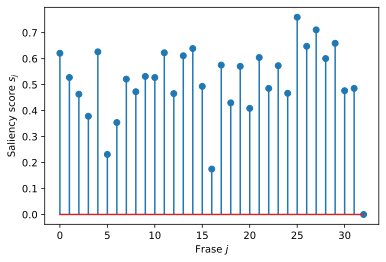

In [ ]:
salience_scores = np.linalg.norm(singular_values.reshape([K,1])*topic_document_mat,axis=0)
plt.stem(salience_scores,use_line_collection=True)
plt.xlabel('Frase $j$')
plt.ylabel('Saliency score $s_j$')
plt.show()

Finalmente buscamos las frases con mayor score

In [ ]:
top_sentence_indices = np.argsort(-salience_scores)[:num_sentences]

# Ordenamos para imprimir en el orden del texto
top_sentence_indices.sort()

In [ ]:
top_sentence_indices

array([ 0,  4, 11, 14, 25, 26, 27, 29])

In [ ]:
sentences = list(doc.sents)

for l in top_sentence_indices:

    print(sentences[l].text)
    print('***************')
    


Democrats have spent the last several years clamoring to raise taxes on corporations and the rich, seeing that as a necessary antidote to widening economic inequality and a rebuke of President Donald J. Trump’s signature tax cuts.
***************
They widely share the goal of reversing many of Mr. Trump’s tax cuts from 2017, and of making the wealthy and big businesses pay more.
***************


Others in his party, including his own transportation secretary, have pushed Mr. Biden to explore tax plans he did not campaign on, like taxing consumption, wealth or vehicle miles traveled.
***************


Democratic lawmakers have promised for decades to raise taxes on companies and the wealthy, a desire that kicked into overdrive after Mr. Trump signed a tax-cut package that delivered an outsize share of its benefits to corporations and high earners.
***************


Democrats widely share a desire to raise the corporate income tax rate after it was cut to 21 percent in 2017.
**********

# 2.2 TextRank

El algoritmo de resumen de [TextRank](https://web.eecs.umich.edu/~mihalcea/papers/mihalcea.emnlp04.pdf) utiliza internamente el popular algoritmo [PageRank](https://en.wikipedia.org/wiki/PageRank), que patentó Google en 1999. El motor de búsqueda de Google lo utiliza cuando proporciona páginas web relevantes basadas en búsquedsa. Para comprender mejor TextRank, debemos comprender algunos de los conceptos que rodean al PageRank. El algoritmo central de PageRank es un algoritmo de puntuación o clasificación basado en gráfos, en el que las páginas se puntúan o clasifican según su importancia. 

### PageRank

Los sitios web y las páginas contienen enlaces incrustados en ellos que enlazan a más páginas que tienen más enlaces y esto continúa a través de Internet. Esto se puede representar como un modelo basado en gráfos donde los vértices indican las páginas web y las conexiones indican los enlaces entre ellos. Esto se puede usar para formar un sistema de votación o recomendación, de modo que cuando un vértice se vincula a otro en el gráfo, básicamente está emitiendo un voto. La importancia del vértice se decide no solo por el número de votos o aristas, sino también por la importancia de los vértices que están conectados a él y su importancia. Esto ayuda a determinar la puntuación o clasificación de cada vértice o página. La siguiente figura ilustra un ejemplo sencillo de PageRank:

<img src='https://upload.wikimedia.org/wikipedia/en/thumb/8/8b/PageRanks-Example.jpg/1920px-PageRanks-Example.jpg' width=400 />

En la figura anterior podemos ver que el sitio web C tiene una puntuación más alta que el sitio web E incluso si tiene menos conexiones en comparación con E, puesto que la Página B es importante y enlaza a la página C. Por lo tanto, podemos definir formalmente PageRank de la siguiente manera. Considere un gráfo dirigido representado como $G = (V, E)$ tal que $V$ representa el conjunto de vértices o páginas y $E$ representa el conjunto de enlaces. $E$ es un subconjunto de $V \times V$. Suponiendo que tenemos una página dada $V_i$ para la que queremos calcular PageRank score $PR(V_i)$, podemos definirlo matemáticamente de la siguiente manera:

$$PR(V_i) = (1-d) + d \times \sum_{j\in \text{In}(V_i)} \frac{PR(V_j)}{|\text{Out}(V_j)|}$$

donde

- $\text{In}(V_i)$ es el conjunto de páginas que enlazan a $V_i$
- $|\text{Out}(V_j)|$ es el número de conexiones salientes de $V_j$
- $d$ es el *damping factor* que toma valores en $[0,1]$. El valor $(1-d)$ representa la probabilidad de saltar desde un vértice dado a otro vértice aleatorio en el gráfo. Suele tomarse como $d=0.85$.

Partiendo de valores arbitrarios asignados a cada nodo en el gráfico, el cálculo se repite hasta que se alcanza la convergencia. 

### TextRank

Volviendo al algoritmo TextRank, al resumir un documento, tendremos un vértice por cada frase. Adicionalmente asociaremos un **peso** $w_{ij}$ a la conexión entre la frase $V_i$ y $V_j$ de tal manera que $w_{ij}$ modela la correlación entre ambos nodos del grafo. Si bien hay distintas alternativas de medir esta correlación, una medida sencilla sería 
$$w_{ij} = \mathbf{a}_i.^T \mathbf{a}_j$$
donde $\mathbf{a}_i$ es la codificación BoW o TF-IDF de la frase $i$. A continuación, TextRank modifica el score de PageRank definido anteriormente para tener en cuenta estos pesos. Tenemos en cuenta que tenemos $n$ nodos conectados todos con todos con pesos $w_{ij}$: 

$$TR(V_i) = (1-d) + d \times \sum_{j=1,j\neq i}^{n} \frac{w_{ij}TR(V_j)}{\sum_{k=1,k\neq j}^n w_{jk}}$$

Una vez obtenido el score $TR$ para todas las frases, resumiremos el documento con las $k$ frases más relevantes.


### Implementación usando `networkx`

Podemos implementar TextRank de forma sencilla utilizando el paquete `networkx` y en particular la función `networkx.pagerank` a la que pasaremos directamente la matriz $\mathbf{A}\mathbf{A}.^T$:


In [ ]:
similitudes = corpus_tfidf_dense.T@corpus_tfidf_dense

In [ ]:
similitudes.shape

(33, 33)

In [ ]:
import networkx

similarity_graph = networkx.from_numpy_array(corpus_tfidf_dense.T@corpus_tfidf_dense)

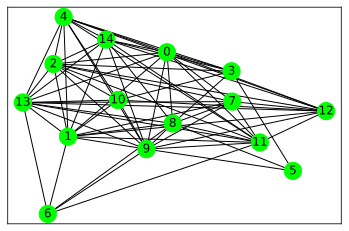

In [ ]:
# A small subset of the network to plot

similarity_graph_red = networkx.from_numpy_array(corpus_tfidf_dense[:,:15].T@corpus_tfidf_dense[:,:15])

networkx.draw_networkx(similarity_graph_red, node_color='lime')

Calculamos los scores e imprimos las frases con mayor valor:

In [ ]:
scores = networkx.pagerank(similarity_graph)

scores_values = np.fromiter(scores.values(), dtype=float)

top_sentence_indices = np.argsort(-scores_values)[:num_sentences]

# Ordenamos para imprimir en el orden del texto
top_sentence_indices.sort()


In [ ]:
top_sentence_indices

array([ 0,  1,  8,  9, 13, 14, 22, 25])

In [ ]:
len(sentences)

33

In [ ]:
for l in top_sentence_indices:

    print(sentences[l].text)
    print('***************')
    


Democrats have spent the last several years clamoring to raise taxes on corporations and the rich, seeing that as a necessary antidote to widening economic inequality and a rebuke of President Donald J. Trump’s signature tax cuts.
***************


Now, under President Biden, they have a shot at ushering in the largest federal tax increase since 1942.
***************


The package, which follows on the heels of Mr. Biden’s $1.9 trillion economic aid bill, is central to the president’s long-term plan to revitalize American workers and industry by funding bridges and roads, universal pre-K, emerging industries like advanced batteries and efforts to invigorate the fight against climate change.
***************


Mr. Biden plans to finance that spending, at least in part, with tax increases that could raise upward of $2.5 trillion in revenue if his plan hews closely to what he proposed in the 2020 presidential campaign.
***************
Mr. Biden has stressed his broad-brush desire to incre

### Implementación usando `gensim`

**Hasta la versión 3.8**, Gensim proporciona una [función directa para TextRank](https://radimrehurek.com/gensim_3.8.3/summarization/summariser.html) que realiza internamente todo el preprocesado:

In [ ]:
from gensim.summarization.summarizer import summarize

summary = summarize(DOCUMENT, ratio=0.2, split=True)

for l in summary:
    
    print(l)
    
    print('***************')

Mr. Biden plans to finance that spending, at least in part, with tax increases that could raise upward of $2.5 trillion in revenue if his plan hews closely to what he proposed in the 2020 presidential campaign.
***************
(A Transportation Department spokesman said on Saturday that there would be no vehicle-miles-traveled tax in the infrastructure proposal.) Mr. Biden has stressed his broad-brush desire to increase the tax burden on wealthy Americans who largely earn their money through inheritance or investment, to fund spending programs meant to help people who earn their money primarily through wages.
***************
Democratic lawmakers have promised for decades to raise taxes on companies and the wealthy, a desire that kicked into overdrive after Mr. Trump signed a tax-cut package that delivered an outsize share of its benefits to corporations and high earners.
***************
Public polling shows broad support, even among many Republican voters, for raising taxes on large co

# 2.3 Algoritmo Rake

[Rapid Automatic Keyword Extraction](https://medium.datadriveninvestor.com/rake-rapid-automatic-keyword-extraction-algorithm-f4ec17b2886c) (RAKE) es un conocido método de extracción de palabras clave que utiliza una lista de  delimitadores de frases para detectar las palabras o frases más relevantes en un fragmento de texto. Este método está muy bien descrito en este [capítulo de libro](https://catalogimages.wiley.com/images/db/pdf/9780470749821.excerpt.pdf).

En comparación a LSA o TextRank, RAKE se caracteriza por una menor complejidad computacional, que puede ser un aspecto crítico en documentos muy largos. 

<img src='http://www.tsc.uc3m.es/~olmos/BBVA/RAKE.png' width=400 />


Aunque RAKE no está incluído en NLTK o gensim, sí hay repositorios libres que lo implementan. Vamos a utilizar [este](https://pypi.org/project/rake-nltk/).

In [ ]:
!pip install rake-nltk

In [ ]:
from rake_nltk import Rake

r = Rake() # Uses stopwords for english from NLTK, and all puntuation characters.

r.extract_keywords_from_text(DOCUMENT)

r.get_ranked_phrases()[:20] # To get keyword phrases ranked highest to lowest.

['large tax increases since president bill clinton signed',
 'largest federal tax increase since 1942',
 'upper end .” democrats widely share',
 'overheating growth spurring runaway inflation',
 'even among many republican voters',
 'includes senator joe manchin iii',
 'emerging industries like advanced batteries',
 '9 trillion economic relief bill',
 '9 trillion economic aid bill',
 'tax increases would cause growth',
 'public polling shows broad support',
 'liberal economists predict would bolster',
 'fastest annual clip since',
 'democrats say encourages wealthy people',
 'last several years clamoring',
 'time spending increases offset',
 'president barack obama campaigned',
 'transportation department spokesman said',
 'including senators bernie sanders',
 'consider additional tax plans']

# 3. Determinación de palabras clave (keywords)

A continuación enumeramos dos técnicas sencillas para determinar palabras clave en un documento.

## 3.1 Co-ocurrencias (Collocations)

La idea de **n-grams** y **co-ocurrencias** ya la habéis visto en sesiones anteriores. La repasamos brevemente. Una colocación se puede definir como una secuencia o grupo de palabras que tienden a ocurrir con frecuencia y esta frecuencia tiende a ser más de lo que podría denominarse una ocurrencia aleatoria o casual. Las colocaciones se calculan a partir de la codificación del texto mediante **n-grams** (secuencias de n palabras consecutivas) y la posterior determinación de los n-grams más frecuentes.

NLTK proporciona funciones para encontrar las co-ocurrencias en el texto y establecer un ranking de acuerdo a diferentes métricas (frecuencia de aparición, información mútua o log-verosimilitud, entre otras).

Vamos a determinar las **co-ocurrencias a partir de bi-gramas** más representativas en el texto de ejemplo:


In [ ]:
from nltk.collocations import BigramCollocationFinder 
from nltk.collocations import BigramAssocMeasures

norm_doc = [w for s in norm_doc_sent for w in s]

finder = BigramCollocationFinder.from_words(norm_doc) # Pasamos el documento normalizado, sin dividir en frases

# Ranking: frecuencia del bi-grama

print(finder.nbest(BigramAssocMeasures.raw_freq, 10))

print('*************')

# Ranking: likelihood_ratio

print(finder.nbest(BigramAssocMeasures.likelihood_ratio, 10))


[('raise', 'taxis'), ('tax', 'increase'), ('tax', 'cut'), ('biden', 'plan'), ('corporation', 'high'), ('earn', 'money'), ('federal', 'borrowing'), ('liberal', 'economist'), ('mile', 'travel'), ('people', 'earn')]
*************
[('raise', 'taxis'), ('vehicle', 'mile'), ('tax', 'increase'), ('federal', 'borrowing'), ('liberal', 'economist'), ('mile', 'travel'), ('widely', 'share'), ('earn', 'money'), ('corporation', 'high'), ('tax', 'cut')]


Podemos proceder de forma similar con los **tri-gramas**:

In [ ]:
from nltk.collocations import TrigramCollocationFinder 
from nltk.collocations import TrigramAssocMeasures


finder = TrigramCollocationFinder.from_words(norm_doc) # Pasamos el documento normalizado, sin dividir en frases

# Ranking: frecuencia del bi-grama

print(finder.nbest(TrigramAssocMeasures.raw_freq, 10))

print('*************')

# Ranking: likelihood_ratio

print(finder.nbest(TrigramAssocMeasures.likelihood_ratio, 10))



[('vehicle', 'mile', 'travel'), ('1942', 'help', 'pay'), ('1993', 'law', 'include'), ('2008', 'financial', 'crisis'), ('2012', 'liberal', 'economist'), ('2017', 'make', 'wealthy'), ('2017', 'tax', 'overhaul'), ('2017', 'want', 'raise'), ('2020', 'presidential', 'campaign'), ('21', 'percent', '2017')]
*************
[('advocate', 'raise', 'taxis'), ('clamor', 'raise', 'taxis'), ('decade', 'raise', 'taxis'), ('pledge', 'raise', 'taxis'), ('voter', 'raise', 'taxis'), ('vehicle', 'mile', 'travel'), ('raise', 'taxis', 'company'), ('raise', 'taxis', 'broad'), ('raise', 'taxis', 'corporation'), ('raise', 'taxis', 'large')]


Podemos observar como los n-grams obtenidos en el ranking dan información relevante acerca del contenido del documento. De echo, la caraterización de un texto mediante el conteo completo de sus n-grams da lugar a una representación vectorial conocida como **Bag-of-n-grams**, una extensión natural de **Bag-of-words**. 

## 3.2 Palabras clave con TextRank

TextRank también puede aplicarse de forma sencilla para encontrar **palabras clave en un documento**. Tal y como se explica el [artículo original](https://web.eecs.umich.edu/~mihalcea/papers/mihalcea.emnlp04.pdf), en este caso definiremos un nodo por cada palabra y las similitud entre palabras (el peso $w_{ij}$) se mide como el número de **co-ocurrencias** de ambas palabras en todo el documento en una ventana de longitud $N$.

Los vértices agregados al gráfo se pueden restringir con filtros sintácticos, por ejemplo restrigiendo el gráfo a verbos y sustantivos.

A través de la función [`gensim.summarization.keywords()`](https://radimrehurek.com/gensim_3.8.3/summarization/keywords.html) podemos obtener las palabras clave utilizando este método.



In [ ]:
from gensim.summarization import keywords

keywords(DOCUMENT,words=15,lemmatize=True,split=True)


['taxing',
 'economic',
 'democratic',
 'like',
 'president',
 'income',
 'spending',
 'plans',
 'senators',
 'business',
 'wealthy',
 'growth',
 'americans',
 'infrastructure',
 'federal']

> **Ejercicio**: Determine las frases más relevantes del siguiente texto en español usando LSA y TextRank

In [ ]:
DOCUMENTO = """
El debate sobre la capacidad cognitiva de los neandertales, la especie humana más cercana a la nuestra, desaparecida hace unos 40.000 años, parece cada vez más cerrado en la comunidad científica: eran tan inteligentes, hábiles, solidarios y creativos como nosotros, los Homo sapiens. Pero ahora, los nuevos descubrimientos genéticos abren un debate todavía más desafiante: ¿y si, en realidad, no se extinguieron? Impulsados por nuevos análisis de ADN fósil, algunos expertos apuntan que los neandertales siguen aquí porque somos nosotros, ya que se produjo una integración entre las dos especies.

Cuanto más material genético se logra extraer y analizar de la prehistoria remota —algo nada sencillo, porque cuanto más antiguo es el ADN, más difícil es que dé resultados fiables— resulta más evidente que los neandertales y los seres humanos mantuvieron cruces constantes. La revista Nature reveló el miércoles los análisis de ADN de cuatro individuos europeos de hace 45.000 años: todos ellos tenían antepasados, más o menos directos, neandertales. Y no es la primera vez que ocurre: los otros dos genomas de Homo sapiens de aquella época que se han logrado analizar también revelan hibridación entre las especies, en un caso, además, muy reciente (su tatarabuelo pertenecía a la otra especie).

Si los cruces entre neandertales y Homo sapiens hubiesen sido raros y muy localizados en el tiempo y en el espacio, esos resultados serían el equivalente científico a encontrar una aguja en el inmenso pajar de la prehistoria. El hecho de que, una y otra vez, aparezcan antepasados directos indica un patrón. No está claro cuántas olas migratorias humanas llegaron desde África a Europa y Asia, ni cuándo se produjeron. Tampoco qué ocurrió con los seres humanos —neandertales y denisovanos— que estaban allí cuando llegó nuestra especie. Pero es evidente que mantuvieron relaciones mucho más que amistosas, como demuestran los resultados obtenidos por el equipo de Svante Pääbo, el genetista sueco que ha revolucionado la investigación de la evolución humana gracias al análisis del ADN antiguo y que obtuvo el primer genoma completo de un neandertal.

“La huella neandertal está muy presente, en seis o siete generaciones anteriores”, explica Antonio Rosas, paleoantropólogo del Consejo Superior de Investigaciones Científicas (CSIC) y uno de los grandes expertos europeos en neandertales. “Cuando se analizaron restos más recientes, parecía que la hibridación había sido más esporádica; pero los nuevos resultados demuestran que es mucho más frecuente”, agrega este investigador que, sin embargo, no comparte la teoría de la “dilución de los neandertales en la población humana”.

“Me parece una visión un poco buenista”, prosigue Rosas. “Los cromañones analizados son claramente sapiens desde el punto de vista fenotípico: no son neandertales, ni tampoco son una mezcla. Pero es indudable que estos nuevos descubrimientos vuelven a abrir el debate sobre la posibilidad de que se produjese una integración de los neandertales y los sapiens. Es posible que en algunos lugares se produjese ese fenómeno; pero también es probable que en otros los neandertales se extinguiesen”. Factores como la geografía o el clima pudieron influir en la extinción o la integración.

Otros expertos creen, en cambio, que estos resultados demuestran sin duda que la extinción no se produjo, sino que los neandertales fueron absorbidos por los sapiens. Raquel Pérez Gómez, bióloga experta en genética y doctora en Ciencias Veterinarias por la Complutense, publicó hace tres años un artículo en EL PAÍS en el que señalaba que la paleogenética estaba minando la idea de que se trata de dos especies diferentes. “Estos resultados confirman (aún más si cabe) la postura de que no se puede hablar de especies, tampoco de híbridos, tampoco de extinción de los neandertales”, señala Pérez Gómez por correo electrónico.

“En ciencia los conceptos son fundamentales”, prosigue Pérez Gómez. “Según [el biólogo evolutivo] Mayr y [el genetista] Dobzhansky, se acepta que una especie biológica es un grupo (o población) natural de individuos que pueden cruzarse entre sí y generar descendencia fértil. Cuantos más fósiles se secuencian, más eventos de cruce entre poblaciones de neandertales y humanos que migraban desde África se documentan. Cuanta más información tengamos, más completo irá siendo el mapa genético y la historia evolutiva de nuestra especie. Y pese a todas las resistencias, dentro de unas décadas quedará claro por el peso de las evidencias que los neandertales eran humanos como nosotros, con características, llamémosles, arcaicas”.

Lo interesante es que el proceso de hibridación no se produjo al revés: en neandertales europeos recientes no se han encontrado restos de ADN de sapiens, lo que indicaría que los humanos modernos adoptaron a neandertales; pero estos no convivieron en sus grupos con humanos modernos. Aunque, como siempre en la prehistoria, cuánto más se sabe, más misterioso resulta todo: Antonio Rosas recuerda que, en cambio, en neandertales siberianos más antiguos, de hace unos 100.000 años, sí se han encontrado huellas sapiens.

Lo que hace no tanto tiempo parecía imposible, se va haciendo realidad. Cuando se estrenó en 1981 la película En busca del fuego, la versión de Jean Jacques Annaud de la novela clásica de J.-H. Rosny Aîné, fue muy criticada porque mostraba una escena de sexo entre una sapiens y un neandertal. La paleogenética lo ha confirmado, pero también recalca algo que tiene una clara lectura contemporánea: el estudio de la prehistoria nos demuestra que es absurdo hablar de razas, que la humanidad es el resultado de un cruce infinito. Nosotros, la humanidad moderna, somos una mezcla interminable, que se prolonga a lo largo de los siglos y de los milenios.
"""


In [ ]:
print(DOCUMENTO)


El debate sobre la capacidad cognitiva de los neandertales, la especie humana más cercana a la nuestra, desaparecida hace unos 40.000 años, parece cada vez más cerrado en la comunidad científica: eran tan inteligentes, hábiles, solidarios y creativos como nosotros, los Homo sapiens. Pero ahora, los nuevos descubrimientos genéticos abren un debate todavía más desafiante: ¿y si, en realidad, no se extinguieron? Impulsados por nuevos análisis de ADN fósil, algunos expertos apuntan que los neandertales siguen aquí porque somos nosotros, ya que se produjo una integración entre las dos especies.

Cuanto más material genético se logra extraer y analizar de la prehistoria remota —algo nada sencillo, porque cuanto más antiguo es el ADN, más difícil es que dé resultados fiables— resulta más evidente que los neandertales y los seres humanos mantuvieron cruces constantes. La revista Nature reveló el miércoles los análisis de ADN de cuatro individuos europeos de hace 45.000 años: todos ellos tenía

#### LSA

In [ ]:
nlp = spacy.load("es_core_news_sm")

doc = nlp(DOCUMENTO)

In [ ]:
norm_doc_sent = [[w.lemma_.lower() for w in s if not w.is_stop 
                  and not w.is_punct and (w.is_alpha or w.is_digit)] for s in doc.sents]


In [ ]:
import gensim

D = gensim.corpora.Dictionary(norm_doc_sent)

n_tokens = len(D)

print('The dictionary contains', n_tokens, 'terms')
print('First terms in the dictionary:')
for n in range(10):
    print(str(n), ':', D[n])

The dictionary contains 253 terms
First terms in the dictionary:
0 : a
1 : año
2 : capacidad
3 : cercano
4 : cerrado
5 : científico
6 : cognitivo
7 : comunidad
8 : creativo
9 : debate


In [ ]:
no_below = 2 #Minimum number of documents to keep a term in the dictionary
no_above = .95 #Maximum proportion of documents in which a term can appear to be kept in the dictionary

D.filter_extremes(no_below=no_below,no_above=no_above)

n_tokens = len(D)

print('The dictionary contains', n_tokens, 'terms')
print('First terms in the dictionary:')
for n in range(10):
    print(str(n), ':', D[n])

The dictionary contains 69 terms
First terms in the dictionary:
0 : a
1 : año
2 : científico
3 : debate
4 : especie
5 : homo
6 : humano
7 : neandertal
8 : sapiens
9 : y


In [ ]:
from gensim.models import TfidfModel
from gensim.matutils import corpus2dense, corpus2csc

corpus_bow = [D.doc2bow(doc) for doc in norm_doc_sent]

model = TfidfModel(corpus_bow)  

corpus_tfidf = model[corpus_bow]

n_tokens = len(D)
num_docs = len(corpus_bow)
# Convert BoW representacion
corpus_bow_dense = corpus2dense(corpus_bow, num_terms=n_tokens, num_docs=num_docs)
# Convert TFIDF representacion
corpus_tfidf_dense = corpus2dense(corpus_tfidf, num_terms=n_tokens, num_docs=num_docs)

In [ ]:
from scipy.sparse.linalg import svds  # Función para calcular la descomposición en valores singulares

num_sentences = 4  # Número de frases clave
K = 4 # Dimensión de bajo rango

u, s, vt = svds(corpus_tfidf_dense, k=K)  
print(u.shape, s.shape, vt.shape)
term_topic_mat, singular_values, topic_document_mat = u, s, vt

(69, 4) (4,) (4, 32)


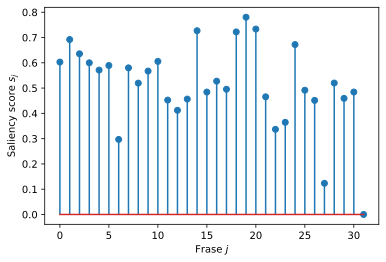

In [ ]:
salience_scores = np.linalg.norm(singular_values.reshape([K,1])*topic_document_mat,axis=0)
plt.stem(salience_scores,use_line_collection=True)
plt.xlabel('Frase $j$')
plt.ylabel('Saliency score $s_j$')
plt.show()

In [ ]:
top_sentence_indices = np.argsort(-salience_scores)[:num_sentences]

# Ordenamos para imprimir en el orden del texto
top_sentence_indices.sort()

In [ ]:
sentences = list(doc.sents)

for l in top_sentence_indices:

    print(sentences[l].text)
    print('***************')

Pero es indudable que estos nuevos descubrimientos vuelven a abrir el debate sobre la posibilidad de que se produjese una integración de los neandertales y los sapiens.
***************
Raquel Pérez Gómez, bióloga experta en genética y doctora en Ciencias Veterinarias por la Complutense, publicó hace tres años un artículo en EL PAÍS en el que señalaba que la paleogenética estaba minando la idea de que se trata de dos especies diferentes.
***************
“Estos resultados confirman (aún más si cabe) la postura de que no se puede hablar de especies, tampoco de híbridos, tampoco de extinción de los neandertales”, señala Pérez Gómez por correo electrónico.
***************


“En ciencia los conceptos son fundamentales”, prosigue Pérez Gómez.
***************


#### TextRank

In [ ]:
similarity_graph = networkx.from_numpy_array(corpus_tfidf_dense.T@corpus_tfidf_dense)

scores = networkx.pagerank(similarity_graph)

scores_values = np.fromiter(scores.values(), dtype=float)

top_sentence_indices = np.argsort(-scores_values)[:num_sentences]

# Ordenamos para imprimir en el orden del texto
top_sentence_indices.sort()

for l in top_sentence_indices:

    print(sentences[l].text)
    print('***************')



El debate sobre la capacidad cognitiva de los neandertales, la especie humana más cercana a la nuestra, desaparecida hace unos 40.000 años, parece cada vez más cerrado en la comunidad científica: eran tan inteligentes, hábiles, solidarios y creativos como nosotros, los Homo sapiens.
***************
Pero ahora, los nuevos descubrimientos genéticos abren un debate todavía más desafiante: ¿y si, en realidad, no se extinguieron? Impulsados por nuevos análisis de ADN fósil, algunos expertos apuntan que los neandertales siguen aquí porque somos nosotros, ya que se produjo una integración entre las dos especies.
***************
Y pese a todas las resistencias, dentro de unas décadas quedará claro por el peso de las evidencias que los neandertales eran humanos como nosotros, con características, llamémosles, arcaicas”.
***************


Lo interesante es que el proceso de hibridación no se produjo al revés: en neandertales europeos recientes no se han encontrado restos de ADN de sapiens, lo q